<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
1. Import Libraries
</span>


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
2. Load Dataset
</span>


In [2]:
df = pd.read_csv('/kaggle/input/diabetesdatast/diabetes.csv')

In [3]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
df.shape

(15000, 10)

In [5]:
df = df.drop(columns=['PatientID'])

In [6]:
df.shape

(15000, 9)

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
3. Checking Missing Values in Dataset
</span>


In [7]:
df.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
4. Checking Duplicate Values in Dataset
</span>


In [8]:
df.duplicated().sum()

0

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
5. Checking Nan Values in Dataset
</span>


In [9]:
df.isna().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
6. Checking Data Types of Dataset's Attributes
</span>


In [10]:
df.dtypes

Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

In [11]:
df['Diabetic'] = df['Diabetic'].astype('category')

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
7. Checking Null and getting feature datatypes of Dataset 
</span>


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Pregnancies             15000 non-null  int64   
 1   PlasmaGlucose           15000 non-null  int64   
 2   DiastolicBloodPressure  15000 non-null  int64   
 3   TricepsThickness        15000 non-null  int64   
 4   SerumInsulin            15000 non-null  int64   
 5   BMI                     15000 non-null  float64 
 6   DiabetesPedigree        15000 non-null  float64 
 7   Age                     15000 non-null  int64   
 8   Diabetic                15000 non-null  category
dtypes: category(1), float64(2), int64(6)
memory usage: 952.4 KB


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
8. List of all columns in Dataset
</span>


In [13]:
df.columns

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [14]:
# Diabetic is target column

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
9. Checking the usage of the memory by the Dataset
</span>


In [15]:
df.memory_usage()

Index                        128
Pregnancies               120000
PlasmaGlucose             120000
DiastolicBloodPressure    120000
TricepsThickness          120000
SerumInsulin              120000
BMI                       120000
DiabetesPedigree          120000
Age                       120000
Diabetic                   15124
dtype: int64

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
10. Numerical and Categorical columns
</span>


In [16]:
for i in df.columns:
    print(df[i].value_counts())

Pregnancies
0     4377
1     2864
3     1219
6     1070
2      939
7      895
9      881
5      687
4      675
8      645
10     450
11     143
13      69
12      57
14      29
Name: count, dtype: int64
PlasmaGlucose
97     263
96     240
118    209
95     199
107    199
      ... 
181      6
186      6
192      5
191      5
190      4
Name: count, Length: 149, dtype: int64
DiastolicBloodPressure
81     445
79     416
78     406
83     404
80     401
      ... 
110      6
31       6
33       5
112      5
117      3
Name: count, Length: 90, dtype: int64
TricepsThickness
11    657
9     593
10    572
45    521
34    517
     ... 
87      2
75      2
70      2
93      1
66      1
Name: count, Length: 69, dtype: int64
SerumInsulin
27     174
28     167
19     162
23     161
16     161
      ... 
474      1
594      1
767      1
716      1
572      1
Name: count, Length: 663, dtype: int64
BMI
43.509726    1
35.062139    1
26.273109    1
36.564569    1
41.443376    1
            ..
39.466277

In [17]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype in ['int64','float64']]

In [18]:

numerical_feature

['Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'SerumInsulin',
 'BMI',
 'DiabetesPedigree',
 'Age']

In [19]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype not in ['int64','float64','datetime64[ns]']]

In [20]:
categorical_feature

['Diabetic']

In [21]:
# There are no ccategorical_feature in dataset

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
11. Feature Information
</span>


In [22]:
df.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


In [23]:
for feature in numerical_feature:
    print("The range of ",feature," is ",df[feature].min() ," to ",df[feature].max())


The range of  Pregnancies  is  0  to  14
The range of  PlasmaGlucose  is  44  to  192
The range of  DiastolicBloodPressure  is  24  to  117
The range of  TricepsThickness  is  7  to  93
The range of  SerumInsulin  is  14  to  799
The range of  BMI  is  18.20051152  to  56.03462763
The range of  DiabetesPedigree  is  0.078043795  to  2.301594189
The range of  Age  is  21  to  77


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
12.Univariate Analysis
</span>


In [24]:
df.var(numeric_only=True)


Pregnancies                  11.499018
PlasmaGlucose              1022.846703
DiastolicBloodPressure      280.854563
TricepsThickness            211.868862
SerumInsulin              17707.159679
BMI                          95.238076
DiabetesPedigree              0.142841
Age                         146.160907
dtype: float64

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
13.Numerical Feature Analysis
</span>


In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature',fontsize=20)

for i in range(0,len(numerical_feature)):
  plt.subplot(5,2,i+1)
  sns.kdeplot(x=df[numerical_feature[i]],fill=True,color='green')
  plt.xlabel(numerical_feature[i])
  plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

In [26]:
print(" Insulin , DiabetesPedigreeFunction , Age are right skewed and positive skewed ")

 Insulin , DiabetesPedigreeFunction , Age are right skewed and positive skewed 


In [27]:
### It means that there are outliers in these columns

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
14. Scatter plot with each numerical feature to explore feature
</span>


In [28]:
plt.figure(figsize=(18, 18))
plt.suptitle("Scatter plot with each numerical feature to explore feature", fontsize=20, color='red')

num_features = len(numerical_feature)
rows = (num_features // 2) + (num_features % 2)  # Dynamically adjust rows if features are less than 8

for i in range(num_features):
    plt.subplot(rows, 2, i + 1)  # Adjust rows dynamically
    sns.scatterplot(y=numerical_feature[i], x=df.index, data=df)
    plt.ylabel(numerical_feature[i])

plt.tight_layout()  # Call this once after the loop
plt.show()

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
15. Multicollinearity in numerical features
</span>


In [29]:
df.corr()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
Pregnancies,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
16. Ploting heatmap
</span>


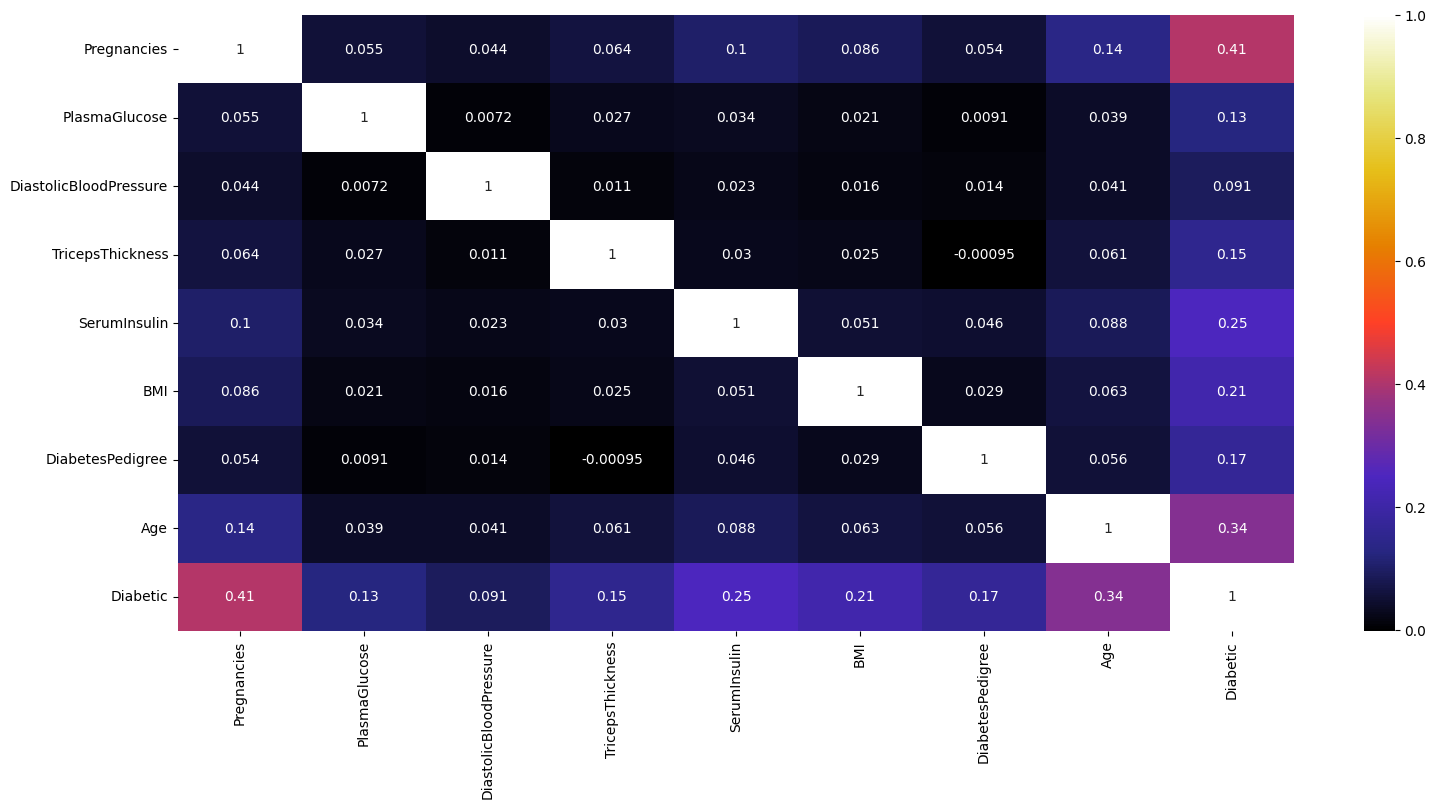

In [30]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),cmap='CMRmap' ,annot=True)
plt.show()

In [31]:
# age and skinThickness are -ve correlated columns

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
17. Strip plot to see the relationship between numerical features and taraget column
</span>


<ipython-input-32-449ebd993f9d>:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y=numerical_feature[i], x='Diabetic', data=df, palette='bright', jitter=True)  # Add jitter for better visualization
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `n

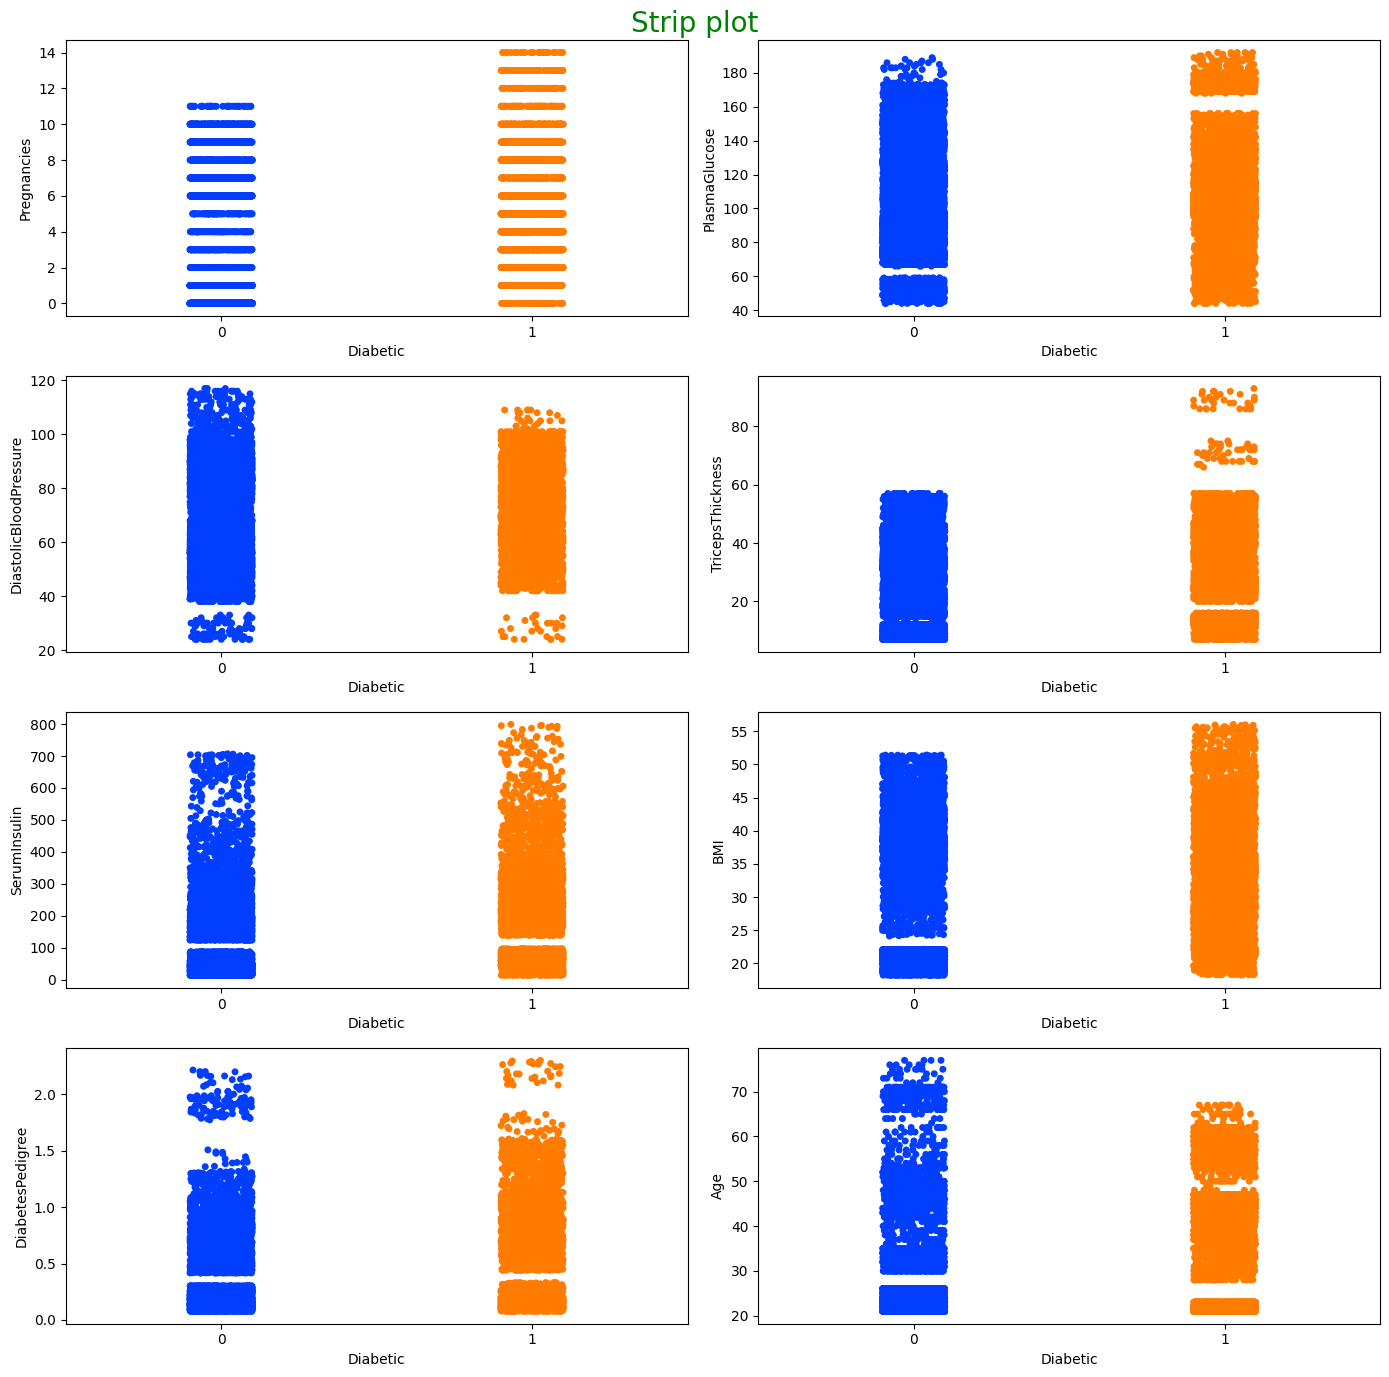

In [32]:
plt.figure(figsize=(14, 14))
plt.suptitle("Strip plot", fontsize=20, color='green')

df['Diabetic'] = df['Diabetic'].astype(str)  # Ensure Outcome is categorical

num_features = len(numerical_feature)
rows = (num_features // 2) + (num_features % 2)  # Dynamically adjust rows

for i in range(num_features):
    plt.subplot(rows, 2, i + 1)  # Adjust rows dynamically
    sns.stripplot(y=numerical_feature[i], x='Diabetic', data=df, palette='bright', jitter=True)  # Add jitter for better visualization
    plt.xlabel('Diabetic')
    plt.ylabel(numerical_feature[i])

plt.tight_layout()  # Call once after loop
plt.show()

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
18.Boxplot to find outliers
</span>


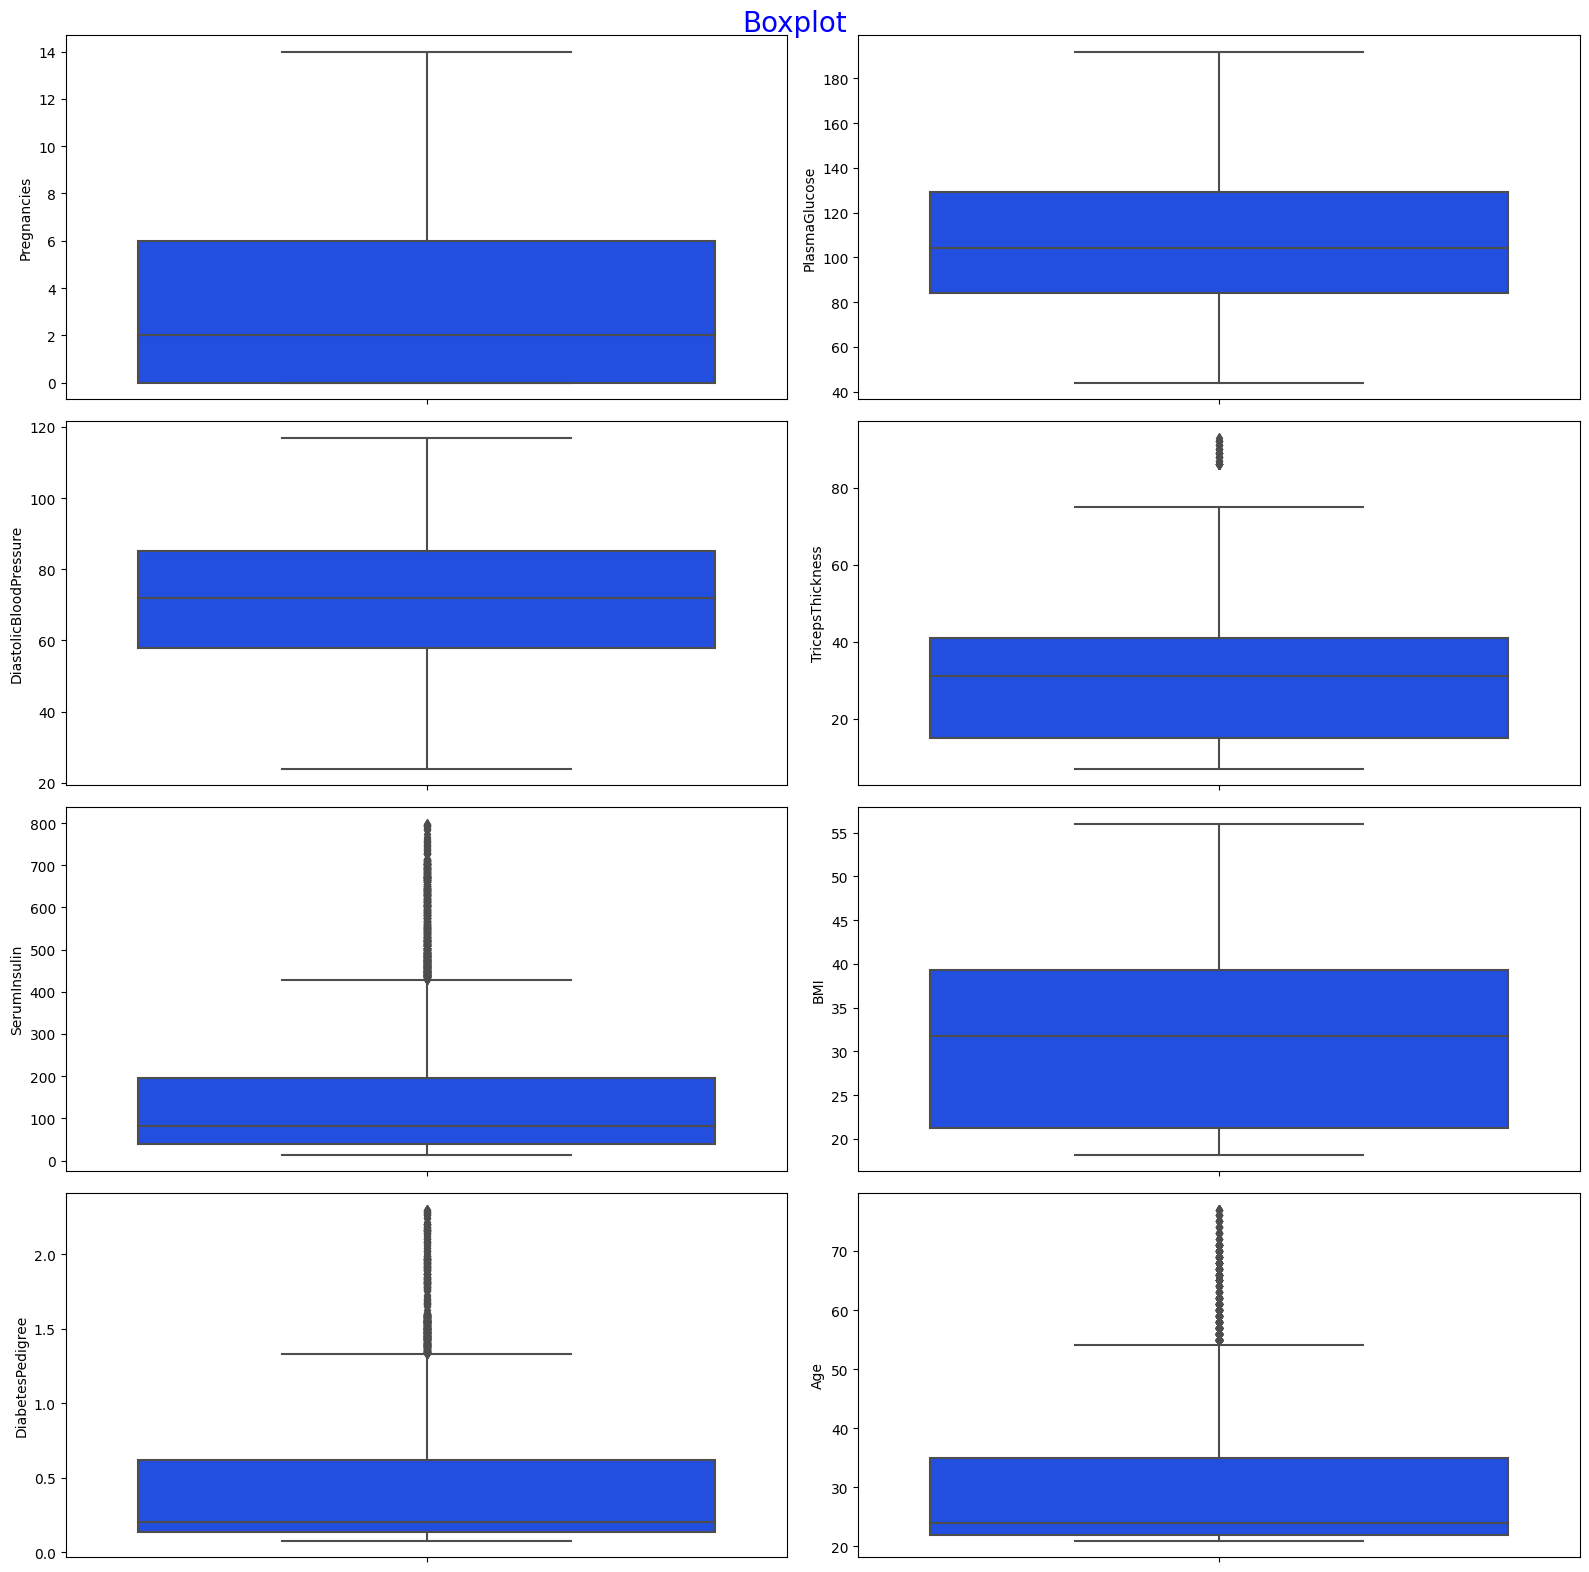

In [33]:
plt.figure(figsize=(16, 16))
plt.suptitle("Boxplot", fontsize=20, color='blue')

num_features = len(numerical_feature)
rows = (num_features // 2) + (num_features % 2)  # Dynamically adjust rows

for i in range(num_features):
    plt.subplot(rows, 2, i + 1)  # Adjust subplot rows dynamically
    sns.boxplot(y=numerical_feature[i], data=df, palette="bright")  # Use y instead of x
    plt.ylabel(numerical_feature[i])

plt.tight_layout()  # Call once after the loop
plt.show()

In [34]:
# There are some outliers in all columns

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
19. Summary statistic for this dataset
</span>


In [35]:
df.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
20. Outlier Handling using Capping 
</span>


In [36]:
def replace_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        # Replace outliers with suitable values (median or mean)
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

In [37]:
df = replace_outliers(df)

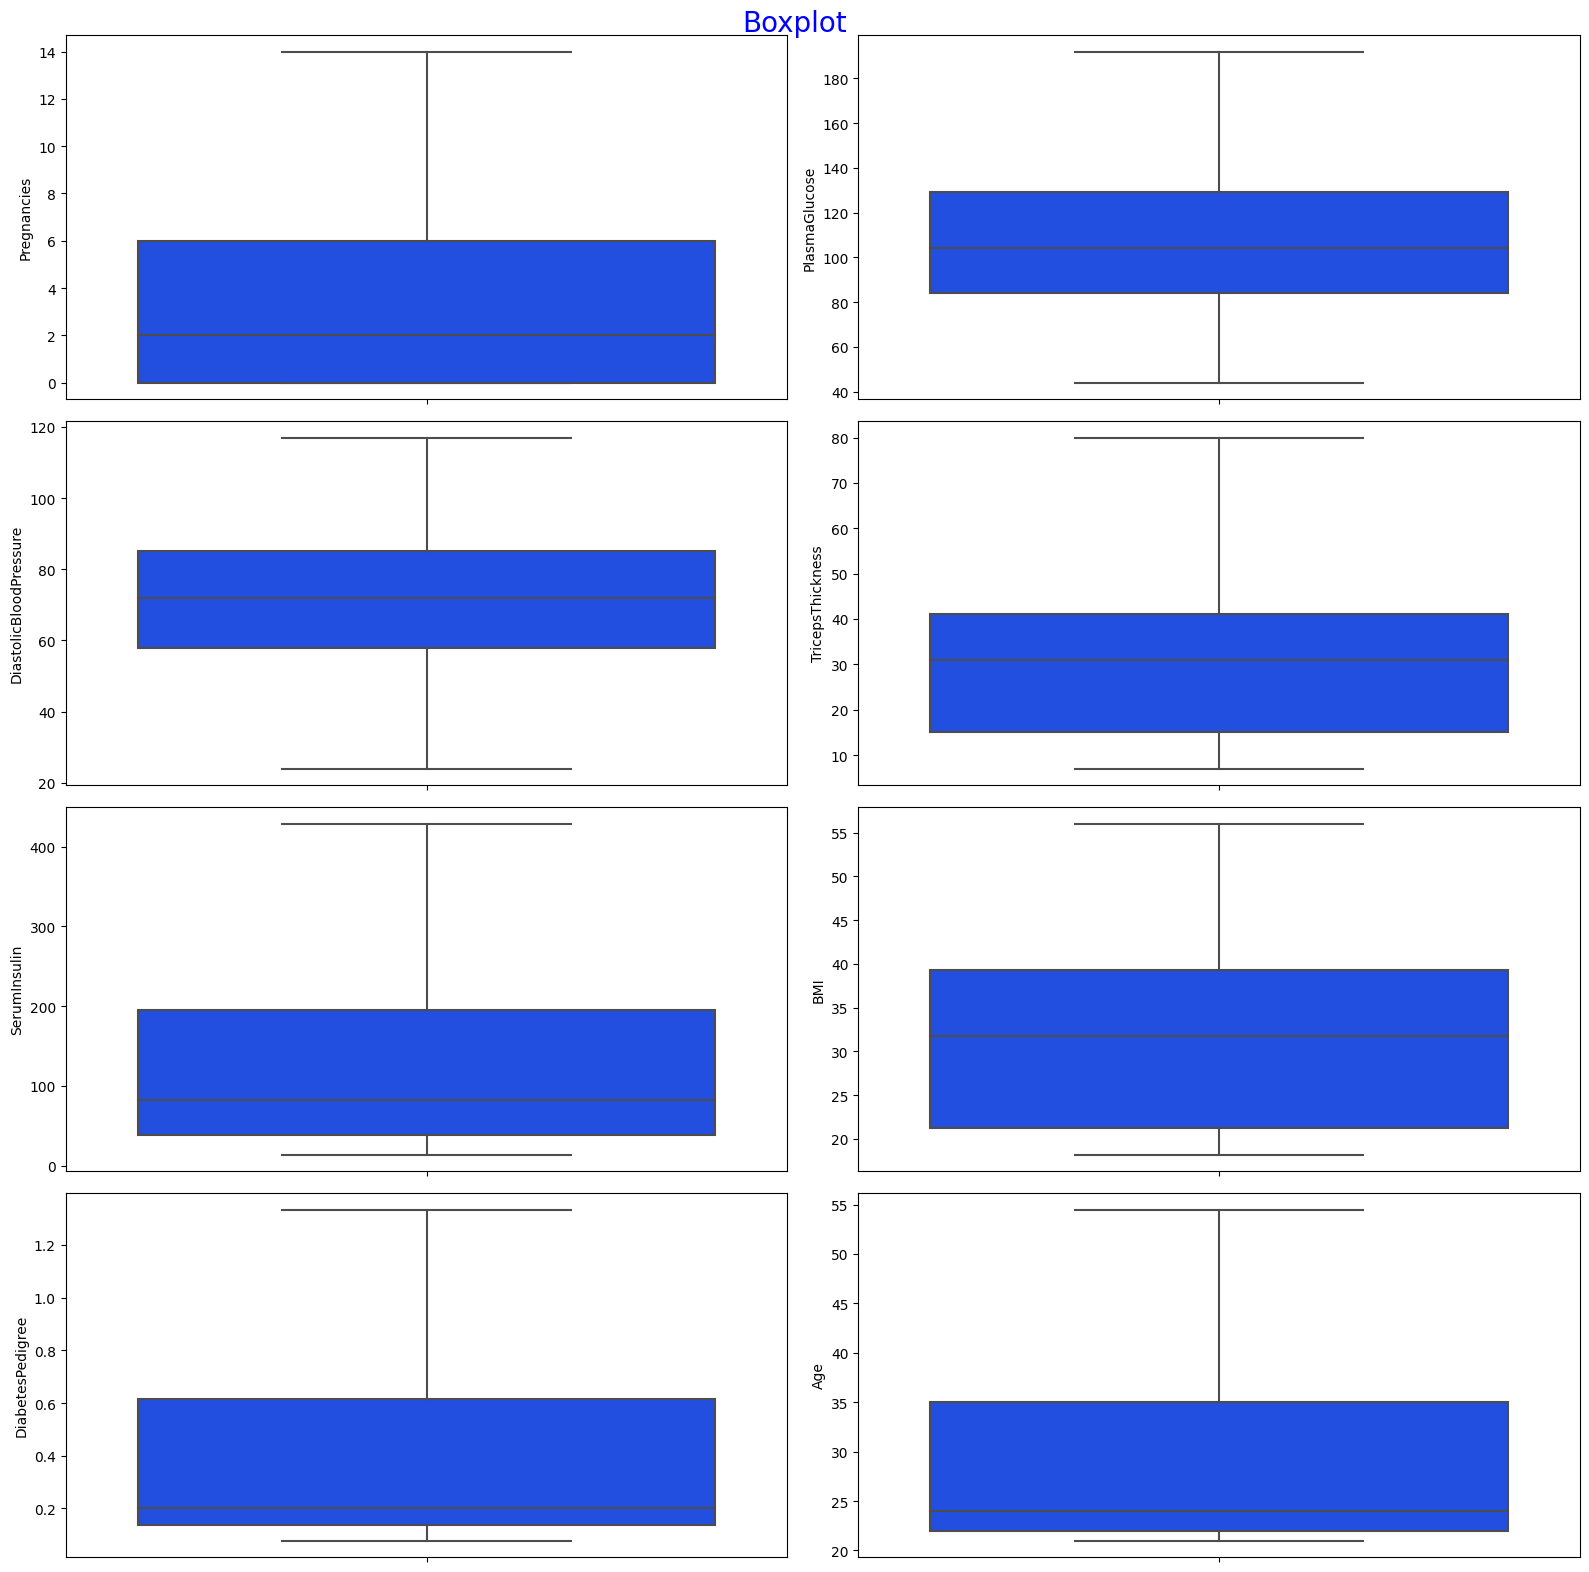

In [38]:
plt.figure(figsize=(16, 16))
plt.suptitle("Boxplot", fontsize=20, color='blue')

num_features = len(numerical_feature)
rows = (num_features // 2) + (num_features % 2)  # Dynamically adjust rows

for i in range(num_features):
    plt.subplot(rows, 2, i + 1)  # Adjust subplot rows dynamically
    sns.boxplot(y=numerical_feature[i], data=df, palette="bright")  # Use y instead of x
    plt.ylabel(numerical_feature[i])

plt.tight_layout()  # Call once after the loop
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  int64  
 1   PlasmaGlucose           15000 non-null  int64  
 2   DiastolicBloodPressure  15000 non-null  int64  
 3   TricepsThickness        15000 non-null  int64  
 4   SerumInsulin            15000 non-null  int64  
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  float64
 8   Diabetic                15000 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 1.0+ MB


In [40]:
df['Diabetic'].value_counts()

Diabetic
0    10000
1     5000
Name: count, dtype: int64

In [41]:
df['Diabetic'].dtype

dtype('O')

In [42]:
df['Diabetic'] = df['Diabetic'].astype('int64')

In [43]:
df['Diabetic'].dtype

dtype('int64')

In [44]:
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21.0,0
1,8,92,93,47,36,21.240576,0.158365,23.0,0
2,7,115,47,52,35,41.511523,0.079019,23.0,0
3,9,103,78,25,304,29.582192,1.282870,43.0,1
4,1,85,59,27,35,42.604536,0.549542,22.0,0


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Train Test Split for Model Building
</span>


In [45]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [47]:
x = df.drop(columns=['Diabetic'])

In [48]:
y = df['Diabetic']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Handling Imbalance Data using Smote 
</span>


In [50]:
X_train.shape

(12000, 8)

In [51]:
X_test.shape

(3000, 8)

In [52]:
#Apply SMOTE on training data
smote = SMOTE(sampling_strategy='auto', random_state=42)


In [53]:
X_train, y_train = smote.fit_resample(X_train, y_train)

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Standardize and feature scaling of the dataset
</span>


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train)

In [57]:
X_test = scaler.transform(X_test)

In [58]:
# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Model Training
</span>


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [62]:
classifiers = {
    'Logistic Regression': LogisticRegression(C=100, solver='liblinear', random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42,max_depth= 10, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 5, n_estimators= 100),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machine': SVC(C=1.0, kernel='rbf', probability=True, random_state=42)  
}

In [63]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Calculate AUC for binary classification
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion_mat, 'AUC': auc_score}

In [64]:
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"AUC: {metrics['AUC']}")
    print()

Classifier: Logistic Regression
Accuracy: 0.785
Confusion Matrix:
[[1608  406]
 [ 239  747]]
AUC: 0.8628676344694641

Classifier: Random Forest Classifier
Accuracy: 0.9216666666666666
Confusion Matrix:
[[1879  135]
 [ 100  886]]
AUC: 0.9782188977361311

Classifier: kNN
Accuracy: 0.858
Confusion Matrix:
[[1763  251]
 [ 175  811]]
AUC: 0.9161996853667331

Classifier: Decision Tree
Accuracy: 0.8916666666666667
Confusion Matrix:
[[1842  172]
 [ 153  833]]
AUC: 0.8797127007499229

Classifier: Naïve Bayes
Accuracy: 0.799
Confusion Matrix:
[[1657  357]
 [ 246  740]]
AUC: 0.8735076573518836

Classifier: Support Vector Machine
Accuracy: 0.886
Confusion Matrix:
[[1803  211]
 [ 131  855]]
AUC: 0.9487824578860755



In [65]:
classifiers = {
    'Logistic Regression (L1 Regularization)': LogisticRegression(penalty='l1', C=100, solver='liblinear', random_state=42),      
}

In [66]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Calculate AUC for binary classification
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion_mat, 'AUC': auc_score}

In [67]:
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"AUC: {metrics['AUC']}")
    print()

Classifier: Logistic Regression (L1 Regularization)
Accuracy: 0.785
Confusion Matrix:
[[1608  406]
 [ 239  747]]
AUC: 0.8628656201719807



In [68]:
classifiers = {
    'Logistic Regression (L2 Regularization)': LogisticRegression(penalty='l2', C=100, solver='liblinear', random_state=42),
    
}

In [69]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Calculate AUC for binary classification
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion_mat, 'AUC': auc_score}

In [70]:
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"AUC: {metrics['AUC']}")
    print()

Classifier: Logistic Regression (L2 Regularization)
Accuracy: 0.785
Confusion Matrix:
[[1608  406]
 [ 239  747]]
AUC: 0.8628676344694641



In [71]:
classifiers = {
    'Logistic Regression (ElasticNet Regularization)': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=100, random_state=42),
    
}

In [72]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Calculate AUC for binary classification
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion_mat, 'AUC': auc_score}

In [73]:
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"AUC: {metrics['AUC']}")
    print()

Classifier: Logistic Regression (ElasticNet Regularization)
Accuracy: 0.785
Confusion Matrix:
[[1608  406]
 [ 239  747]]
AUC: 0.8628651165976098



In [74]:
!pip install xgboost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier  # Make sure to install XGBoost using: pip install xgboost

# Adding boosting algorithms to classifiers dictionary
boosting_classifiers = {
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [76]:
results = {}
for name, clf in boosting_classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Calculate AUC for binary classification
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion_mat, 'AUC': auc_score}

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [77]:
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"AUC: {metrics['AUC']}")
    print()

Classifier: Gradient Boosting
Accuracy: 0.937
Confusion Matrix:
[[1901  113]
 [  76  910]]
AUC: 0.9873446724853007

Classifier: AdaBoost
Accuracy: 0.9056666666666666
Confusion Matrix:
[[1814  200]
 [  83  903]]
AUC: 0.9692655972089894

Classifier: XGBoost
Accuracy: 0.936
Confusion Matrix:
[[1894  120]
 [  72  914]]
AUC: 0.9867756334462011



<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Hyperparameter Tuning
</span>


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)



# Define hyperparameter grids and their scoring metrics
param_grids = {
    'Logistic Regression': {
        'params': {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']},
        'scoring': 'f1'  # Best for medical classification problems
    },
    'Random Forest Classifier': {
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None],
                   'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
                   'max_features': ['sqrt', 'log2']},
        'scoring': 'f1'
    },
    'kNN': {
        'params': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan']},
        'scoring': 'accuracy'
    },
    'Decision Tree': {
        'params': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 5]},
        'scoring': 'f1'
    },
    'Naïve Bayes': {
        'params': {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]},
        'scoring': 'recall'  # Minimize false negatives in medical problems
    },
    'Support Vector Machine': {
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4],
                   'gamma': ['scale', 'auto']},
        'scoring': 'roc_auc'  # Best for model discrimination
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Dictionary to store results
results = {}

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Performing Grid Search for {name} using {param_grids[name]['scoring']} as the scoring metric...")

    grid_search = GridSearchCV(model, param_grids[name]['params'], cv=5,
                               scoring=param_grids[name]['scoring'], n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        'Best Params': grid_search.best_params_,
        'Metric Used': param_grids[name]['scoring'],
        'Best Score from GridSearchCV': grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc_score,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

# Print results
for name, metrics in results.items():
    print(f"\nClassifier: {name}")
    print(f"Best Parameters: {metrics['Best Params']}")
    print(f"Scoring Metric Used: {metrics['Metric Used']}")
    print(f"Best Score from GridSearchCV: {metrics['Best Score from GridSearchCV']:.4f}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print(f"AUC: {metrics['AUC'] if metrics['AUC'] != 'N/A' else 'N/A'}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print("-" * 50)


Performing Grid Search for Logistic Regression using f1 as the scoring metric...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing Grid Search for Random Forest Classifier using f1 as the scoring metric...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Performing Grid Search for kNN using accuracy as the scoring metric...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Performing Grid Search for Decision Tree using f1 as the scoring metric...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Performing Grid Search for Naïve Bayes using recall as the scoring metric...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Performing Grid Search for Support Vector Machine using roc_auc as the scoring metric...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Classifier: Logistic Regression
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Scoring Metric Used: f1
Best Score from GridSearchCV: 0.7738
Accura

In [80]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, log_loss

# Define parameter grids
param_grids = {
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Initialize models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store results
results = {}



# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")
    
    # Use F1-score as primary metric, but also consider AUC for ranking models
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'], refit='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    logloss = log_loss(y_test, y_proba)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc_score,
        'Log Loss': logloss,
        'Confusion Matrix': confusion_mat
    }

# Print results
for name, metrics in results.items():
    print(f"\nClassifier: {name}")
    print(f"Best Parameters: {metrics['Best Params']}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall (Sensitivity): {metrics['Recall']:.4f}")
    print(f"AUC: {metrics['AUC']:.4f}")
    print(f"Log Loss: {metrics['Log Loss']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print("-" * 50)


Performing Grid Search for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Performing Grid Search for AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Performing Grid Search for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\xgboost\core.py:158: UserWarning: [17:21:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classifier: Gradient Boosting
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.9510
F1-Score: 0.9259
Precision: 0.9199
Recall (Sensitivity): 0.9320
AUC: 0.9887
Log Loss: 0.1296
Confusion Matrix:
[[1934   80]
 [  67  919]]
--------------------------------------------------

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
Accuracy: 0.9440
F1-Score: 0.9163
Precision: 0.9002
Recall (Sensitivity): 0.9331
AUC: 0.9885
Log Loss: 0.6660
Confusion Matrix:
[[1912  102]
 [  66  920]]
--------------------------------------------------

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.9517
F1-Score: 0.9269
Precision: 0.9218
Recall (Sensitivity): 0.9320
AUC: 0.9892
Log Loss: 0.1277
Confusion Matrix:
[[1936   78]
 [  67  919]]
--------------------------------------------------


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Save the Best Model (Classifier)
</span>


In [61]:
import joblib
from xgboost import XGBClassifier

# Best Parameters for XGBoost
best_params = {'learning_rate': 0.19, 'max_depth': 3, 'n_estimators': 300}

# Train the best XGBoost model
best_xgb = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
best_xgb.fit(X_train, y_train)


y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]
    
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)
logloss = log_loss(y_test, y_proba)
confusion_mat = confusion_matrix(y_test, y_pred)


# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9523
F1 Score: 0.9283
Precision: 0.9177
Recall: 0.9391
AUC Score: 0.9912
Log Loss: 0.1146
Confusion Matrix:
[[1931   83]
 [  60  926]]


In [62]:
# Save the model
joblib.dump(best_xgb, "/kaggle/working/xgboost_best_model.pkl")
print("Best XGBoost model saved as xgboost_best_model.pkl")




Best XGBoost model saved as xgboost_best_model.pkl
Sample Predictions: [0 1 0 1 0 0 1 0 0 0]


<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Load the Model from Local Directory
</span>


In [63]:
# Load the saved model
loaded_model = joblib.load("/kaggle/working/xgboost_best_model.pkl")

<span style="color: red; font-size: 30px; font-weight: bold; background-color: yellow;">
Prediction Examples
</span>


In [64]:
y_pred = loaded_model.predict(X_test)

In [65]:
y_pred 

array([0, 1, 0, ..., 1, 0, 0])

In [66]:
X_test.shape

(3000, 8)

In [67]:
y_test

11499    0
6475     1
13167    0
862      0
5970     0
        ..
6216     1
3585     1
10023    0
14044    0
12965    0
Name: Diabetic, Length: 3000, dtype: int64

In [68]:
y_test.shape

(3000,)

In [69]:
df.columns

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')